In [18]:
using Printf
using LinearAlgebra
using SparseArrays

In [19]:
import PyPlot
const plt = PyPlot

PyPlot

In [39]:
plt.svg(true)
plt.matplotlib.style.use("dark_background")

Persamaan difusi 1d:
$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$

Parameter fisis

In [2]:
seconds_per_yr = 60.0*60*24*365  # Number of seconds in one year (s)
Lx = 1e4  # Length of spatial domain (m)
Cp = 1e3  # rock heat capacity (J/Kg/K)
rho = 2700.0  # rock density
K = 3.3  # bulk thermal conductivity (W/m/K)
κ = K/(Cp*rho)  # thermal diffusivity
A = 2.6e-6  # Heat production per volume per second (W/m^3)
H = A/(rho*Cp);  # Heat source term (K/s)

Parameter boundary:

In [5]:
Tb = 0.0 ;   # Temperature at boundaries (degree Celcius)

Parameter numerik:

In [7]:
dt = 1000*seconds_per_yr
Ntime = 5000
Nelements  = 40  # Total number of elements
NnodesPerElement = 2  # no. of nodes per element
NnodesTotal = Nelements + 1  # Total number of nodes
dx = Lx/Nelements;

Inisialisasi koordinat global:

In [8]:
# Spatial domain (uniform mesh)
g_coord = 0.0:dx:Lx;

0.0:250.0:10000.0

In [10]:
typeof(g_coord)

StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}

In [12]:
# Boundary condition
bcdof = [1, NnodesTotal] # boundary nodes
bcval = [Tb, Tb]; # boundary values

Connectivity and equation numbering:

In [13]:
g_num = zeros(Int64,NnodesPerElement,Nelements)
g_num[1,:] = collect(1:NnodesTotal-1)
g_num[2,:] = collect(2:NnodesTotal);

In [28]:
# Matrices and vectors
ff = zeros(Float64, NnodesTotal)  # system load vector
b = zeros(Float64, NnodesTotal)   # system rhs vector
LHS = spzeros(Float64, NnodesTotal, NnodesTotal) # system lhs matrix
RHS = spzeros(Float64, NnodesTotal, NnodesTotal) # system rhs matrix
displ = zeros(Float64, NnodesTotal);  # temperature

Coba matrix assembly:

In [29]:
for iel = 1:Nelements
    num = g_num[:,iel] # get equation number

    dx = abs( g_coord[num[2]] - g_coord[num[1]] ) # length of the element
    
    # Mass matrix
    MM = dx*[ 1/3 1/6;
              1/6 1/3]
    # Stiffness
    KM = [ κ/dx -κ/dx;
          -κ/dx  κ/dx]
    # Load vector
    F = dx*H*[1/2; 1/2]

    LHS[num,num] = LHS[num,num] + MM/dt + KM
    RHS[num,num] = RHS[num,num] + MM/dt
    ff[num] = ff[num] + F;
end

In [30]:
LHS

41×41 SparseMatrixCSC{Float64, Int64} with 121 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁

In [31]:
RHS

41×41 SparseMatrixCSC{Float64, Int64} with 121 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁

In [33]:
LHS[1,2] = 0.0
LHS[1,1] = 1.0
LHS[NnodesTotal,2] = 0.0
LHS[NnodesTotal,NnodesTotal] = 1.0;

In [35]:
displ = zeros(NnodesTotal)
b = zeros(NnodesTotal);

Time loop:

In [37]:
t = 0.0
for n in 1:Ntime
    t = t + dt
    b = RHS*displ + ff
    displ = LHS\b
end

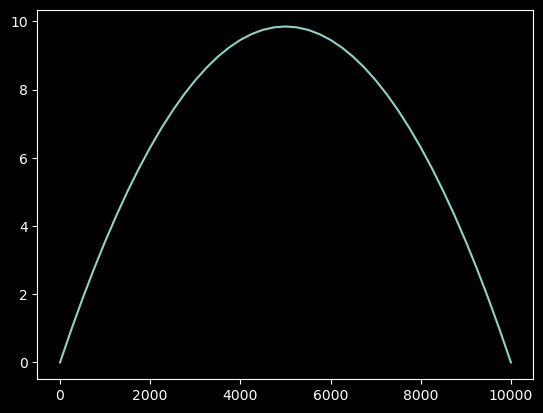

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f806338d310>

In [40]:
plt.plot(g_coord, displ)